In [1]:
"""
Steps involved in linear regression analysis:

1. Capture & clean data
    - Read data files in any format
    - Filter out & handle missing data

2. Response & Predictors
    - Identify Predictor columns to define X
    - Identify Response columns to define Y  
    
3. Normalizing data & checks
    - Identify: Select numerical columns that need to be normalized
    - Execute: Import preprocessing & employ minmaxscaler function to normalize data
    - Validate: Make sure that correlation coefficients of normalized data looks similar to non-normalized data. 
       This is doneby plotting out a correlation matrix and looking at correlation coefficients.

4. Data Training
    - Data Split: Split data into training & test data sets. 
                  Employ train_test_split to divide data into trainable & testable chunks     
    - Import training models from Python library sklearn.linear_model. Currently employing:
        - Linear Regression, Ridge, Lasso, LassoLars, BayesianRidge
    - Compare linear regression models with each other in terms of RMSE
    - Pick the correct training model  with lowest RMSE

5. Apply model fit to predict
    - Fit the training data for predictors to responses
    - Print the "parameters" & intercept values
    - Employ the prediction model with the test values of X to predict
    - calculate the regression RMSE using sqrt(mean_squared_error(predict-target)) formula
    
6. Deploy the model
    - Come up with test data, use a dummy value for response
    - Normalize all column values, isolate all predictor values and convert it to a list of list
    - use .predict (normalized test data) to get the normalized test result 
    - Put back the predicted test value into the list of lists
    - Perform an .inverse_transform(test transform) to denormalize the data

"""

'\nSteps involved in linear regression analysis:\n\n1. Capture & clean data\n    - Read data files in any format\n    - Filter out & handle missing data\n\n2. Response & Predictors\n    - Identify Predictor columns to define X\n    - Identify Response columns to define Y  \n    \n3. Normalizing data & checks\n    - Identify: Select numerical columns that need to be normalized\n    - Execute: Import preprocessing & employ minmaxscaler function to normalize data\n    - Validate: Make sure that correlation coefficients of normalized data looks similar to non-normalized data. \n       This is doneby plotting out a correlation matrix and looking at correlation coefficients.\n\n4. Data Training\n    - Data Split: Split data into training & test data sets. \n                  Employ train_test_split to divide data into trainable & testable chunks     \n    - Import training models from Python library sklearn.linear_model. Currently employing:\n        - Linear Regression, Ridge, Lasso, LassoL

In [2]:
"""
D e f i n i t i o n s

Regression, Linear & multi-variate
======

Regression analysis is a statistical process to use an array of independent predictive elements to understand which 
of those predictive elements have an impact on a desired prediction factor.

The analysis is either linear or non-linear in nature.

A linear regression equation is one that has a linear dependency of predictors to a response. Specifically, a model 
is linear when:
  - Each term is constant
  - Each term is a Product of a parameter(bk) & a predictor value (xk)

A linear equation is constructed by adding the results for each term. They are of the  form:

Response = constant + parameter * predictor + ... + parameter * predictor + random error/noise
or 

Y = b o + b1*X1 + b2*X2 + ... + bk*Xk + error 

Note that an expression is linear when it is linear in parameters. 

While the equation must be linear in the parameters, you can transform the predictor variables in ways that 
produce curvature. For instance, you can include a squared variable to produce a U-shaped curve.

Y = b o + b1*X1 + b2*X1^2 + .... + bk*Xk^k + error

Regression, Non-linear
====
More complex forms that do not involve each term being a straight forward product of a parameter & predictor values.

Examples: Fourier, Weibull expressions, cosine & trigonometric expressions

Power (convex): Theta1 * X^Theta2
Weibull growth: Theta1 + (Theta2 - Theta1) * exp(-Theta3) * X^Theta4
Fourier: Theta1 * cos(X + Theta4) + (Theta2 * cos(2*X + Theta4) + Theta3


Significance of Normalization
======
Normalization is a technique to change the values of numerical columns in a data set to a common scale, without 
distoring differences in the range of values. 

Not every data set requires normalization, only those that have predictor elements in different value ranges.

This is to avoid some predictors from disproportionately influencing the outcome of a prediction due to their larger values.

For ex:
Consider a data set containing two features, age(x1), and income(x2), very different in range. 
Where age ranges from 0–100, while income ranges from 0–20,000 and higher. 
Income is about 1,000 times larger than age and ranges from 20,000–500,000. 
Due to its larger range, the attributed income will intrinsically influence the result. 
But this doesn’t necessarily mean it is more important as a predictor.
Hence, Normalization is needed.

## However, I have found this not to be true with the dataset that I had studied below
"""

'\nD e f i n i t i o n s\n\nRegression, Linear & multi-variate\n======\n\nRegression analysis is a statistical process to use an array of independent predictive elements to understand which \nof those predictive elements have an impact on a desired prediction factor.\n\nThe analysis is either linear or non-linear in nature.\n\nA linear regression equation is one that has a linear dependency of predictors to a response. Specifically, a model \nis linear when:\n  - Each term is constant\n  - Each term is a Product of a parameter(bk) & a predictor value (xk)\n\nA linear equation is constructed by adding the results for each term. They are of the  form:\n\nResponse = constant + parameter * predictor + ... + parameter * predictor + random error/noise\nor \n\nY = b o + b1*X1 + b2*X2 + ... + bk*Xk + error \n\nNote that an expression is linear when it is linear in parameters. \n\nWhile the equation must be linear in the parameters, you can transform the predictor variables in ways that \nprodu

In [3]:
"""

Normalization vs Standardization
======

"https://www.statisticshowto.datasciencecentral.com/normalized/"

Normalization refers to scaling a variable to have values between 0 to 1. This is also known as "feature scaling".
Mathematically, Xnew = (X - xmin)/(xmax - xmin)


Standardization refers to scaling data such that it has 0 mean and standard deviation of 1. 
This is also called a z-score, and data points can be standardized as:
zi = (xi - mean(x))/sigma

"""

'\n\nNormalization vs Standardization\n======\n\n"https://www.statisticshowto.datasciencecentral.com/normalized/"\n\nNormalization refers to scaling a variable to have values between 0 to 1. This is also known as "feature scaling".\nMathematically, Xnew = (X - xmin)/(xmax - xmin)\n\n\nStandardization refers to scaling data such that it has 0 mean and standard deviation of 1. \nThis is also called a z-score, and data points can be standardized as:\nzi = (xi - mean(x))/sigma\n\n'

In [4]:
#1 Try to see if Normalization makes any difference to Homeprices in C1_Student_PyforML exercise

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline
import pandas as pd
import math
import statistics
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge

In [6]:
df = pd.read_csv("SoSJ_housing_data.csv")

In [7]:
df.describe()

,HomeAge,HomeSqft,LotSize,BedRooms,HighSchoolAPI,ProxFwy,CarGarage,HomePriceK
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,17.200000,1615.280000,7840.500000,2.71000,904.610000,3.100000,1.520000,1080.990000
std,4.925711,231.759719,1046.107306,0.71485,36.166253,0.758787,1.234848,146.533583
min,10.000000,1215.000000,6056.000000,2.00000,851.000000,2.000000,0.000000,809.000000
25%,12.750000,1411.500000,7024.250000,2.00000,875.750000,3.000000,0.000000,940.000000
50%,17.000000,1606.500000,7822.000000,3.00000,901.500000,3.000000,2.000000,1100.000000
75%,21.250000,1836.000000,8839.250000,3.00000,936.000000,4.000000,3.000000,1191.000000
max,25.000000,1994.000000,9476.000000,4.00000,975.000000,4.000000,3.000000,1336.000000


In [8]:
float_array = df.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler() # min = 0; max =1 --> all values  will  be scaled in this  range
scaled_array = min_max_scaler.fit_transform(float_array)
df_normalized = pd.DataFrame(scaled_array,columns = ["HomeAge","HomeSqft","LotSize","BedRooms","HighSchoolAPI","ProxFwy","CarGarage","HomePriceK"])
print("Dataframe shape: ",df_normalized.shape,"\n") # 
print(df_normalized[0:5])

Dataframe shape:  (100, 8) 

    HomeAge  HomeSqft   LotSize  BedRooms  HighSchoolAPI  ProxFwy  CarGarage  \
0  0.266667  0.516046  0.683626       0.0       0.000000      0.0   0.000000   
1  0.200000  0.183569  0.223099       0.0       0.000000      0.5   0.666667   
2  0.800000  0.653402  0.375146       0.5       1.000000      0.5   1.000000   
3  0.133333  0.934531  0.348830       0.0       0.991935      0.0   0.000000   
4  0.200000  0.797176  0.283918       0.0       0.927419      0.5   1.000000   

   HomePriceK  
0    0.624288  
1    0.094877  
2    0.434535  
3    0.419355  
4    0.199241  


In [9]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('RdYlBu', 30)
    labels = ["m","HomeAge","HomeSqft","LotSize","BedRooms","HighSchoolAPI","ProxFwy","CarGarage","HomePriceK"]
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.7,.75,.8,.85,.90,.95,1])
    plt.show() # for large data sets model convergence is faster

In [10]:
df.corr()

,HomeAge,HomeSqft,LotSize,BedRooms,HighSchoolAPI,ProxFwy,CarGarage,HomePriceK
HomeAge,1.000000,0.005498,0.133927,0.005164,-0.004151,-0.035133,-0.100304,0.154894
HomeSqft,0.005498,1.000000,-0.084197,0.032016,0.046302,-0.035486,-0.046856,-0.051960
LotSize,0.133927,-0.084197,1.000000,0.529351,-0.141361,-0.146570,-0.023795,0.962220
BedRooms,0.005164,0.032016,0.529351,1.000000,0.098336,0.054004,0.012358,0.510955
HighSchoolAPI,-0.004151,0.046302,-0.141361,0.098336,1.000000,-0.087640,0.104783,-0.137037
ProxFwy,-0.035133,-0.035486,-0.146570,0.054004,-0.087640,1.000000,0.073306,-0.190496
CarGarage,-0.100304,-0.046856,-0.023795,0.012358,0.104783,0.073306,1.000000,-0.055459
HomePriceK,0.154894,-0.051960,0.962220,0.510955,-0.137037,-0.190496,-0.055459,1.000000


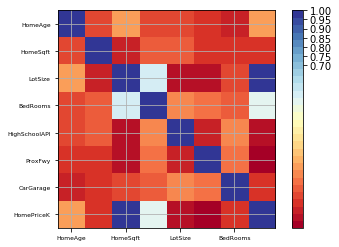

In [11]:
correlation_matrix(df) # original data

In [12]:
df_normalized.corr()

,HomeAge,HomeSqft,LotSize,BedRooms,HighSchoolAPI,ProxFwy,CarGarage,HomePriceK
HomeAge,1.000000,0.005498,0.133927,0.005164,-0.004151,-0.035133,-0.100304,0.154894
HomeSqft,0.005498,1.000000,-0.084197,0.032016,0.046302,-0.035486,-0.046856,-0.051960
LotSize,0.133927,-0.084197,1.000000,0.529351,-0.141361,-0.146570,-0.023795,0.962220
BedRooms,0.005164,0.032016,0.529351,1.000000,0.098336,0.054004,0.012358,0.510955
HighSchoolAPI,-0.004151,0.046302,-0.141361,0.098336,1.000000,-0.087640,0.104783,-0.137037
ProxFwy,-0.035133,-0.035486,-0.146570,0.054004,-0.087640,1.000000,0.073306,-0.190496
CarGarage,-0.100304,-0.046856,-0.023795,0.012358,0.104783,0.073306,1.000000,-0.055459
HomePriceK,0.154894,-0.051960,0.962220,0.510955,-0.137037,-0.190496,-0.055459,1.000000


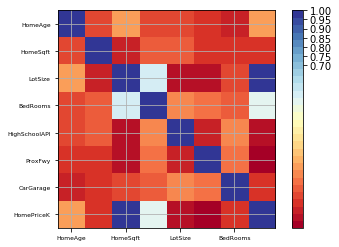

In [13]:
correlation_matrix(df_normalized) # normalized data

In [14]:
X = df_normalized.drop('HomePriceK',axis=1)
y = df_normalized['HomePriceK']

##  Exercise 1: Study the impact of Normalization and compare its impact on different linear regression algorithms  

In [15]:
# Split data to training and test
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("X_train shape: ",X_train.shape) # 75 rows, 7 columns
print("y_train shape: ",y_train.shape) # 75 rows, 1 column
print("X_test shape: ",X_test.shape) # 25 rows, 7 columns
print("y_test shape: ",y_test.shape) # 25 rows, 1 column
# print(y_train)

X_train shape:  (75, 7)
y_train shape:  (75,)
X_test shape:  (25, 7)
y_test shape:  (25,)


In [16]:
# fit normalized training data, predict a response and calculate the RMSE

lm = LinearRegression()
lm.fit(X_train,y_train)
y_predict = lm.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
print("Normalized Linear Regression RMSE: ",math.sqrt(regression_model_mse))

Normalized Linear Regression RMSE:  0.07676601766438633


In [17]:
# give trial data and see how it works
Test_data = np.array([[16,1825,6955,3,850,4,3,90000]])
Test_data_norm = min_max_scaler.transform(Test_data)
print("Normalized data:",Test_data_norm)
Test1 = [list(Test_data_norm[0][0:7])]
print (Test1)

Normalized data: [[ 4.00000000e-01  7.83055199e-01  2.62865497e-01  5.00000000e-01
  -8.06451613e-03  1.00000000e+00  1.00000000e+00  1.69242884e+02]]
[[0.4, 0.7830551989730425, 0.26286549707602336, 0.5, -0.008064516129032029, 1.0, 1.0]]


In [18]:
test_result = lm.predict(Test1)
print ("Test result predicted (normalized) is: ", test_result[0])

Test result predicted (normalized) is:  0.27425169125086607


In [19]:
Test_data_norm[0][7] = test_result[0]   #replace existing value with predicted value
print ("test row with predicted value is:", Test_data_norm)

test row with predicted value is: [[ 0.4         0.7830552   0.2628655   0.5        -0.00806452  1.
   1.          0.27425169]]


In [20]:
result = min_max_scaler.inverse_transform(Test_data_norm) # apply inverse transform
print("Final test result: ",result)
print("Predicted HomePriceK: ",result[0][7])

Final test result:  [[1.60000000e+01 1.82500000e+03 6.95500000e+03 3.00000000e+00
  8.50000000e+02 4.00000000e+00 3.00000000e+00 9.53530641e+02]]
Predicted HomePriceK:  953.5306412892064


In [21]:
## Comparison with non-normalized approach

In [22]:
X2 = df.drop('HomePriceK',axis=1)
y2 = df['HomePriceK']

In [23]:
# Split data to training and test
from sklearn.model_selection import train_test_split

# Split X and y into X_
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=1)
print("X2_train shape: ",X2_train.shape) 
print("y2_train shape: ",y2_train.shape) 
print("X2_test shape: ",X2_test.shape) 
print("y2_test shape: ",y2_test.shape) 
# print(y_train)

X2_train shape:  (75, 7)
y2_train shape:  (75,)
X2_test shape:  (25, 7)
y2_test shape:  (25,)


In [24]:
# fit non-normalized training data, predict a response and calculate the RMSE
lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)
y2_predict = lm2.predict(X2_test)
regression_model2_mse = mean_squared_error(y2_predict, y2_test)
print("Non-normalized Linear Regression RMSE:  ",math.sqrt(regression_model2_mse))

Non-normalized Linear Regression RMSE:   40.455691309131716


In [25]:
print ("Test data :", Test_data)

Test data : [[   16  1825  6955     3   850     4     3 90000]]


In [26]:
# predict using the above test data
# select portion of data to create test set

Test2 = [list(Test_data[0][0:7])]
print (Test2)

[[16, 1825, 6955, 3, 850, 4, 3]]


In [27]:
Test_result2 = lm2.predict(Test2)
print ("Test result predicted (non-normalized) is: ", Test_result2[0])

Test result predicted (non-normalized) is:  953.5306412892062


In [28]:
###  comparison of fits between normalized and non-normalized for different algorithms

In [29]:
# Dictionary of models
d_models = {"Linear_Regression": LinearRegression(),
            "Ridge": Ridge(alpha=0.5),
            "Lasso": Lasso(alpha=0.1),
            "LassoLars": LassoLars(alpha=0.1),
            "BayesianRidge": BayesianRidge()}
models_list = d_models.keys()
print(models_list)

dict_keys(['Linear_Regression', 'Ridge', 'Lasso', 'LassoLars', 'BayesianRidge'])


In [30]:
for regression_model in models_list:
    regressor = d_models[regression_model]
    regressor.fit(X_train,y_train)
    y_predict = regressor.predict(X_test)
    regression_model_mse = mean_squared_error(y_predict, y_test)
    print(regression_model," normalized RMSE : ",math.sqrt(regression_model_mse))
    test_result = regressor.predict(Test1)
    #print ("Test result predicted (normalized) is: ", test_result[0])
    Test_data_norm[0][7] = test_result[0]   #replace existing value with predicted value
    #print ("test row with predicted value is:", Test_data_norm)
    result = min_max_scaler.inverse_transform(Test_data_norm) # apply inverse transform
    #print("Final test result: ",result)
    print("Predicted HomePriceK: ",result[0][7])
    print("\n")

Linear_Regression  normalized RMSE :  0.07676601766438633
Predicted HomePriceK:  953.5306412892064


Ridge  normalized RMSE :  0.07043484557315978
Predicted HomePriceK:  967.3892273819806


Lasso  normalized RMSE :  0.2785641515458047
Predicted HomePriceK:  1068.2800000000002


LassoLars  normalized RMSE :  0.2785641515458047
Predicted HomePriceK:  1068.2800000000002


BayesianRidge  normalized RMSE :  0.07576513424788761
Predicted HomePriceK:  955.214255043949




In [31]:
for regression_model in models_list:
    regressor = d_models[regression_model]
    regressor.fit(X2_train,y2_train)
    y2_predict = regressor.predict(X2_test)
    regression_model_mse = mean_squared_error(y2_predict, y2_test)
    print(regression_model," RMSE : ",math.sqrt(regression_model_mse))
    Test_result2 = regressor.predict(Test2)
    print ("Test result predicted (non-normalized) is: ", Test_result2[0])
    print ("\n")

Linear_Regression  RMSE :  40.455691309131716
Test result predicted (non-normalized) is:  953.5306412892062


Ridge  RMSE :  40.44657248160054
Test result predicted (non-normalized) is:  953.529618961304


Lasso  RMSE :  40.4078426805018
Test result predicted (non-normalized) is:  953.4489632329703


LassoLars  RMSE :  39.39457786428023
Test result predicted (non-normalized) is:  952.2262117906909


BayesianRidge  RMSE :  39.917041511647994
Test result predicted (non-normalized) is:  961.8791294848497




###  Conclusion: 
### Normalization with LinearRegression does not impact predicted outcome. But it improves predictability for BeyesianRidge while worsening it for Lasso, Ridge & LassoLars algorithms --> suggesting there is a dependency on the type of algorithm employed 

##  Exercise 2: Study the impact of "Standardization" of data on HomePriceK

In [33]:
# Copy  df
df2 = df.copy()

In [34]:
# Create z-scores of all columns, create a new df with zscores

# Store all means and Std Devs for each column in separate lists
cols = list(df2.columns)
Std_z=[]
Mean_z=[]

# For each column calculate its Zscore and append it as a new column in data frame
for col in cols:
    col_zscore = col + '_zscore'
    df2[col_zscore] = (df2[col] - df2[col].mean())/df2[col].std(ddof=1)
    Std_z.append(df2[col].std(ddof=1))
    Mean_z.append(df2[col].mean())

#New data frame containing only Z-scores    
dfZ =  df2.iloc[:,8:16].copy()
cols_z = list(dfZ.columns)
print ("columns : ", cols_z)
print ("std deviation list :", Std_z, len(Std_z))
print ("Mean list :", Mean_z, len(Std_z))

columns :  ['HomeAge_zscore', 'HomeSqft_zscore', 'LotSize_zscore', 'BedRooms_zscore', 'HighSchoolAPI_zscore', 'ProxFwy_zscore', 'CarGarage_zscore', 'HomePriceK_zscore']
std deviation list : [4.925710736799946, 231.75971883122244, 1046.1073056572613, 0.7148497051899099, 36.166253314213776, 0.7587869106393283, 1.2348475553073277, 146.53358252660314] 8
Mean list : [17.2, 1615.28, 7840.5, 2.71, 904.61, 3.1, 1.52, 1080.99] 8


In [35]:
df2.head()

,HomeAge,HomeSqft,LotSize,BedRooms,HighSchoolAPI,ProxFwy,CarGarage,HomePriceK,HomeAge_zscore,HomeSqft_zscore,LotSize_zscore,BedRooms_zscore,HighSchoolAPI_zscore,ProxFwy_zscore,CarGarage_zscore,HomePriceK_zscore
0,14,1617,8394,2,851,2,0,1138,-0.649652,0.007421,0.529104,-0.993216,-1.482321,-1.449682,-1.230921,0.389058
1,13,1358,6819,2,851,3,2,859,-0.852669,-1.110115,-0.976477,-0.993216,-1.482321,-0.131789,0.388712,-1.514943
2,22,1724,7339,3,975,3,3,1038,0.974479,0.469107,-0.479396,0.405680,1.946290,-0.131789,1.198529,-0.293380
3,12,1943,7249,2,974,2,0,1030,-1.055685,1.414051,-0.565430,-0.993216,1.918639,-1.449682,-1.230921,-0.347975
4,13,1836,7027,2,966,3,3,914,-0.852669,0.952366,-0.777645,-0.993216,1.697439,-0.131789,1.198529,-1.139602


In [36]:
dfZ.head()

,HomeAge_zscore,HomeSqft_zscore,LotSize_zscore,BedRooms_zscore,HighSchoolAPI_zscore,ProxFwy_zscore,CarGarage_zscore,HomePriceK_zscore
0,-0.649652,0.007421,0.529104,-0.993216,-1.482321,-1.449682,-1.230921,0.389058
1,-0.852669,-1.110115,-0.976477,-0.993216,-1.482321,-0.131789,0.388712,-1.514943
2,0.974479,0.469107,-0.479396,0.405680,1.946290,-0.131789,1.198529,-0.293380
3,-1.055685,1.414051,-0.565430,-0.993216,1.918639,-1.449682,-1.230921,-0.347975
4,-0.852669,0.952366,-0.777645,-0.993216,1.697439,-0.131789,1.198529,-1.139602


In [37]:
X3 = dfZ.drop('HomePriceK_zscore',axis=1)
y3 = dfZ['HomePriceK_zscore']

In [38]:
# Split X and y into X_
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=1)
print("X3_train shape: ",X3_train.shape) # 75 rows, 7 columns
print("y3_train shape: ",y3_train.shape) # 75 rows, 1 column
print("X3_test shape: ",X3_test.shape) # 25 rows, 7 columns
print("y3_test shape: ",y3_test.shape) # 25 rows, 1 column
# print(y_train)

X3_train shape:  (75, 7)
y3_train shape:  (75,)
X3_test shape:  (25, 7)
y3_test shape:  (25,)


In [39]:
# fit normalized training data, predict a response and calculate the RMSE
lm3 = Ridge()
lm3.fit(X3_train,y3_train)
y3_predict = lm3.predict(X3_test)
regression_model_mse = mean_squared_error(y3_predict, y3_test)
print("Standardized Linear Regression RMSE: ",math.sqrt(regression_model_mse))

Standardized Linear Regression RMSE:  0.26987985082904886


In [40]:
# give trial data and see how it works

Test_data = np.array([[16,1825,6955,3,850,4,3,90000]])
Test_data_Z =[]
for col in range(8):
    Test_data_Z.append((Test_data[0][col]-Mean_z[col])/Std_z[col])
Test_data_ZS = [Test_data_Z]
print("zscore values:",Test_data_ZS)
Test3 = [list(Test_data_ZS[0][0:7])]
print ("\n")
print (Test3)

zscore values: [[-0.24361966508402713, 0.9049027201863638, -0.8464714807088045, 0.4056796804902612, -1.5099711746623647, 1.186103749788844, 1.1985285095629954, 606.8165977164775]]


[[-0.24361966508402713, 0.9049027201863638, -0.8464714807088045, 0.4056796804902612, -1.5099711746623647, 1.186103749788844, 1.1985285095629954]]


In [41]:
test_result = lm3.predict(Test3)
print ("Test result predicted (Z-scored) is: ", test_result)

Test result predicted (Z-scored) is:  [-0.84955058]


In [42]:
Test_data_ZS[0][7] = test_result[0]   
print ("test row with predicted value is:", Test_data_ZS[0])

test row with predicted value is: [-0.24361966508402713, 0.9049027201863638, -0.8464714807088045, 0.4056796804902612, -1.5099711746623647, 1.186103749788844, 1.1985285095629954, -0.8495505836775986]


In [43]:
Predicted_final = []
for val in range(8):
    Predicted_final.append(Test_data_ZS[0][val]*Std_z[val]+Mean_z[val])
print("Final test result: ",Predicted_final)
print("Predicted HomePriceK using Z-Scores: ",Predicted_final[7])

Final test result:  [16.0, 1825.0, 6955.0, 3.0, 850.0, 4.0, 3.0, 956.5023094361547]
Predicted HomePriceK using Z-Scores:  956.5023094361547


In [44]:
for regression_model in models_list:
    regressor = d_models[regression_model]
    regressor.fit(X3_train,y3_train)
    y3_predict = regressor.predict(X3_test)
    regression_model_mse = mean_squared_error(y3_predict, y3_test)
    print(regression_model," Standardized RMSE : ",math.sqrt(regression_model_mse))
    test_result = regressor.predict(Test3)
    Test_data_ZS[0][7] = test_result[0]  
    Predicted_final2 = []
    for val in range(8):
        Predicted_final2.append(Test_data_ZS[0][val]*Std_z[val]+Mean_z[val])
    print("Predicted HomePriceK: ",Predicted_final2[7])
    print("\n")

Linear_Regression  Standardized RMSE :  0.27608477600543807
Predicted HomePriceK:  953.5306412892061


Ridge  Standardized RMSE :  0.2728591901776528
Predicted HomePriceK:  955.0412487375594


Lasso  Standardized RMSE :  0.2601619399492912
Predicted HomePriceK:  970.1930582523522


LassoLars  Standardized RMSE :  0.9013971282498363
Predicted HomePriceK:  1057.4923096316268


BayesianRidge  Standardized RMSE :  0.2724671549965388
Predicted HomePriceK:  955.2296077804482




# Conclusion: No outright proof that Standardization is much better than Normalization in terms of predictability..